In [106]:
from keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

In [107]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [108]:
train_labels[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [109]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [110]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [111]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\Jcwil\anaconda3\envs\xgb\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [113]:

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [114]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [115]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [116]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7743 - loss: 0.5267 - val_acc: 0.8641 - val_loss: 0.3935
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8964 - loss: 0.3135 - val_acc: 0.8815 - val_loss: 0.3131
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9219 - loss: 0.2343 - val_acc: 0.8904 - val_loss: 0.2812
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9389 - loss: 0.1873 - val_acc: 0.8881 - val_loss: 0.2757
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9478 - loss: 0.1570 - val_acc: 0.8872 - val_loss: 0.2784
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9564 - loss: 0.1333 - val_acc: 0.8807 - val_loss: 0.3121
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9676 - loss: 0.1103 - val_acc: 0.8847 - val_loss: 0.3006
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9685 - loss: 0.0990 - val_acc: 0.8850 - val_loss: 0.3149
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9774 - loss:

In [117]:
history_dict = history.history
history_dict.keys()


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

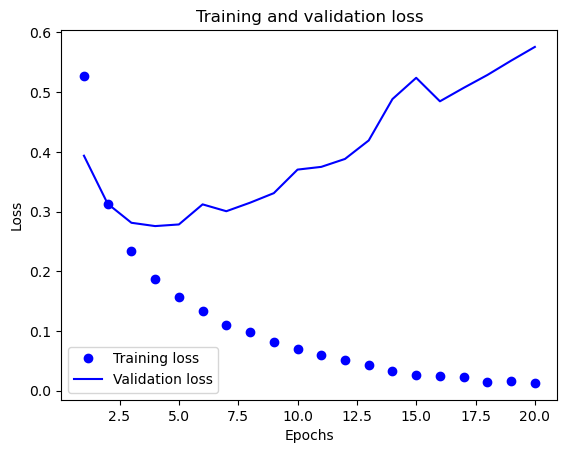

In [118]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [119]:
# 1 hidden layer of 16 units
model_1layer = models.Sequential()
model_1layer.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1layer.add(layers.Dense(1, activation='sigmoid'))

model_1layer.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['acc'])

history_1layer = model_1layer.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_1, test_acc_1 = model_1layer.evaluate(x_test, y_test)
print("1-layer model test accuracy:", test_acc_1)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7905 - loss: 0.5288 - val_acc: 0.8475 - val_loss: 0.4276
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8890 - loss: 0.3573 - val_acc: 0.8760 - val_loss: 0.3441
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9098 - loss: 0.2841 - val_acc: 0.8804 - val_loss: 0.3156
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9207 - loss: 0.2418 - val_acc: 0.8855 - val_loss: 0.2914
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9351 - loss: 0.2095 - val_acc: 0.8785 - val_loss: 0.2947
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9393 - loss: 0.1877 - val_acc: 0.8874 - val_loss: 0.2812
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9477 - loss: 0.1682 - val_acc: 0.8878 - val_loss: 0.2762
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9539 - loss: 0.1525 - val_acc: 0.8861 - val_loss: 0.2775
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9569 - loss:

In [120]:
# 3 hidden layers of 16 units each
model_3layer = models.Sequential()
model_3layer.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3layer.add(layers.Dense(16, activation='relu'))
model_3layer.add(layers.Dense(16, activation='relu'))
model_3layer.add(layers.Dense(1, activation='sigmoid'))

model_3layer.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['acc'])

history_3layer = model_3layer.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_3, test_acc_3 = model_3layer.evaluate(x_test, y_test)
print("3-layer model test accuracy:", test_acc_3)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7665 - loss: 0.5588 - val_acc: 0.8362 - val_loss: 0.4424
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8896 - loss: 0.3468 - val_acc: 0.8760 - val_loss: 0.3286
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9138 - loss: 0.2539 - val_acc: 0.8599 - val_loss: 0.3345
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9311 - loss: 0.2005 - val_acc: 0.8911 - val_loss: 0.2741
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9443 - loss: 0.1646 - val_acc: 0.8863 - val_loss: 0.2830
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9548 - loss: 0.1387 - val_acc: 0.8868 - val_loss: 0.2885
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9616 - loss: 0.1181 - val_acc: 0.8846 - val_loss: 0.3110
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9703 - loss: 0.0967 - val_acc: 0.8816 - val_loss: 0.3225
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9720 - loss:

In [121]:
model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_32.add(layers.Dense(32, activation='relu'))
model_32.add(layers.Dense(1, activation='sigmoid'))

model_32.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['acc'])

history_32 = model_32.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_32, test_acc_32 = model_32.evaluate(x_test, y_test)
print("32-unit model test accuracy:", test_acc_32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7707 - loss: 0.5017 - val_acc: 0.8686 - val_loss: 0.3604
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8939 - loss: 0.3013 - val_acc: 0.8856 - val_loss: 0.2942
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9234 - loss: 0.2170 - val_acc: 0.8886 - val_loss: 0.2752
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9353 - loss: 0.1827 - val_acc: 0.8883 - val_loss: 0.2789
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9484 - loss: 0.1516 - val_acc: 0.8632 - val_loss: 0.3563
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9587 - loss: 0.1260 - val_acc: 0.8727 - val_loss: 0.3312
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9584 - loss: 0.1208 - val_acc: 0.8813 - val_loss: 0.3124
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9717 - loss: 0.0900 - val_acc: 0.8798 - val_loss: 0.3311
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9791 - loss:

In [122]:
model_64 = models.Sequential()
model_64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_64.add(layers.Dense(64, activation='relu'))
model_64.add(layers.Dense(1, activation='sigmoid'))

model_64.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['acc'])

history_64 = model_64.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_64, test_acc_64 = model_64.evaluate(x_test, y_test)
print("64-unit model test accuracy:", test_acc_64)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7509 - loss: 0.5219 - val_acc: 0.8660 - val_loss: 0.3646
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8836 - loss: 0.3076 - val_acc: 0.8847 - val_loss: 0.2918
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9219 - loss: 0.2171 - val_acc: 0.8376 - val_loss: 0.3903
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9281 - loss: 0.1895 - val_acc: 0.8828 - val_loss: 0.2854
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9443 - loss: 0.1509 - val_acc: 0.8462 - val_loss: 0.4025
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9543 - loss: 0.1274 - val_acc: 0.8742 - val_loss: 0.3303
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9601 - loss: 0.1115 - val_acc: 0.8820 - val_loss: 0.3174
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9749 - loss: 0.0810 - val_acc: 0.8781 - val_loss: 0.3436
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9807 - loss:

In [123]:
model_128 = models.Sequential()
model_128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_128.add(layers.Dense(128, activation='relu'))
model_128.add(layers.Dense(1, activation='sigmoid'))

model_128.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['acc'])

history_128 = model_128.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_128, test_acc_128 = model_128.evaluate(x_test, y_test)
print("128-unit model test accuracy:", test_acc_128)

c:\Users\Jcwil\anaconda3\envs\xgb\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.7568 - loss: 0.5135 - val_acc: 0.8721 - val_loss: 0.3336
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8819 - loss: 0.2990 - val_acc: 0.8573 - val_loss: 0.3460
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9115 - loss: 0.2263 - val_acc: 0.8866 - val_loss: 0.2769
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9276 - loss: 0.1862 - val_acc: 0.8850 - val_loss: 0.2811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9493 - loss: 0.1415 - val_acc: 0.8881 - val_loss: 0.2827
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9555 - loss: 0.1199 - val_acc: 0.8851 - val_loss: 0.3052
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9743 - loss: 0.0797 - val_acc: 0.8644 - val_loss: 0.3906
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9745 - loss: 0.0793 - val_acc: 0.8843 - val_loss: 0.3553
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9821 - loss

In [125]:
model_256 = models.Sequential()
model_256.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model_256.add(layers.Dense(256, activation='relu'))
model_256.add(layers.Dense(1, activation='sigmoid'))

model_256.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['acc'])

history_256 = model_256.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_256, test_acc_256 = model_256.evaluate(x_test, y_test)
print("256-unit model test accuracy:", test_acc_256)

c:\Users\Jcwil\anaconda3\envs\xgb\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7458 - loss: 0.5267 - val_acc: 0.7101 - val_loss: 0.6050
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8655 - loss: 0.3208 - val_acc: 0.8607 - val_loss: 0.3258
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9062 - loss: 0.2363 - val_acc: 0.8822 - val_loss: 0.2841
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9283 - loss: 0.1889 - val_acc: 0.8781 - val_loss: 0.2973
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9499 - loss: 0.1379 - val_acc: 0.8196 - val_loss: 0.4849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9655 - loss: 0.0983 - val_acc: 0.7981 - val_loss: 0.6363
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9665 - loss: 0.0953 - val_acc: 0.8821 - val_loss: 0.3136
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9782 - loss: 0.0714 - val_acc: 0.8829 - val_loss: 0.3324
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9843

In [ ]:
# Baseline architecture but with MSE loss
model_mse = models.Sequential()
model_mse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(16, activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

model_mse.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss='mse',
                  metrics=['acc'])

history_mse = model_mse.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_mse, test_acc_mse = model_mse.evaluate(x_test, y_test)
print("MSE loss model test accuracy:", test_acc_mse) #better than baseline


c:\Users\Jcwil\anaconda3\envs\xgb\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7346 - loss: 0.1974 - val_acc: 0.8568 - val_loss: 0.1507
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8855 - loss: 0.1169 - val_acc: 0.8808 - val_loss: 0.1073
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9121 - loss: 0.0846 - val_acc: 0.8843 - val_loss: 0.0937
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9281 - loss: 0.0675 - val_acc: 0.8888 - val_loss: 0.0868
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9410 - loss: 0.0560 - val_acc: 0.8884 - val_loss: 0.0847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9520 - loss: 0.0471 - val_acc: 0.8794 - val_loss: 0.0873
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9557 - loss: 0.0429 - val_acc: 0.8802 - val_loss: 0.0890
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9617 - loss: 0.0376 - val_acc: 0.8802 - val_loss: 0.0863
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9685 - loss:

In [ ]:
# tanh
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_tanh.add(layers.Dense(16, activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid'))

model_tanh.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['acc'])

history_tanh = model_tanh.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_tanh, test_acc_tanh = model_tanh.evaluate(x_test, y_test)
print("tanh model test accuracy:", test_acc_tanh) #slightly worse than baseline

c:\Users\Jcwil\anaconda3\envs\xgb\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7870 - loss: 0.4916 - val_acc: 0.8576 - val_loss: 0.3741
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8999 - loss: 0.2906 - val_acc: 0.8791 - val_loss: 0.3023
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9226 - loss: 0.2150 - val_acc: 0.8792 - val_loss: 0.2947
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9415 - loss: 0.1693 - val_acc: 0.8892 - val_loss: 0.2740
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9567 - loss: 0.1318 - val_acc: 0.8594 - val_loss: 0.3665
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9621 - loss: 0.1126 - val_acc: 0.8821 - val_loss: 0.3148
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9694 - loss: 0.0925 - val_acc: 0.8744 - val_loss: 0.3530
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9757 - loss: 0.0755 - val_acc: 0.8684 - val_loss: 0.3929
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9806 - loss:

In [128]:
# Baseline architecture but with MSE loss and 256 units
model_mse = models.Sequential()
model_mse.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(256, activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

model_mse.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss='mse',
                  metrics=['acc'])

history_mse = model_mse.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_mse, test_acc_mse = model_mse.evaluate(x_test, y_test)
print("MSE loss + 256 model test accuracy:", test_acc_mse) #better than baseline


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7126 - loss: 0.1910 - val_acc: 0.7607 - val_loss: 0.1625
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8615 - loss: 0.1047 - val_acc: 0.7849 - val_loss: 0.1515
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8904 - loss: 0.0833 - val_acc: 0.8779 - val_loss: 0.0898
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9121 - loss: 0.0673 - val_acc: 0.8759 - val_loss: 0.0908
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9227 - loss: 0.0586 - val_acc: 0.8743 - val_loss: 0.0914
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9353 - loss: 0.0505 - val_acc: 0.8839 - val_loss: 0.0838
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9490 - loss: 0.0420 - val_acc: 0.8827 - val_loss: 0.0847
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9551 - loss: 0.0365 - val_acc: 0.8833 - val_loss: 0.0856
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9644

In [129]:
# Baseline architecture but with MSE loss and 256 units and 3 layers
model_mse = models.Sequential()
model_mse.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(256, activation='relu'))
model_mse.add(layers.Dense(256, activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

model_mse.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss='mse',
                  metrics=['acc'])

history_mse = model_mse.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_mse, test_acc_mse = model_mse.evaluate(x_test, y_test)
print("MSE loss + 256 + 3 layers model test accuracy:", test_acc_mse) #better than baseline


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7001 - loss: 0.2011 - val_acc: 0.8417 - val_loss: 0.1226
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8589 - loss: 0.1045 - val_acc: 0.8070 - val_loss: 0.1391
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.8932 - loss: 0.0800 - val_acc: 0.8815 - val_loss: 0.0874
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9139 - loss: 0.0656 - val_acc: 0.8681 - val_loss: 0.0961
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9318 - loss: 0.0532 - val_acc: 0.8722 - val_loss: 0.0949
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9471 - loss: 0.0414 - val_acc: 0.8736 - val_loss: 0.0955
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9603 - loss: 0.0330 - val_acc: 0.8462 - val_loss: 0.1218
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9650 - loss: 0.0302 - val_acc: 0.8816 - val_loss: 0.0908
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9697